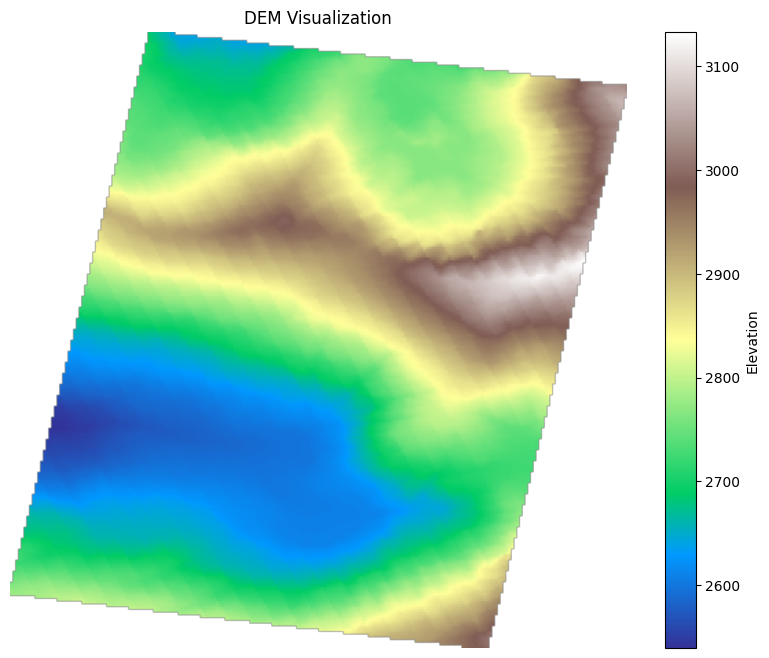

In [4]:
import rasterio
from rasterio import warp

import matplotlib.pyplot as plt

tif_path = "/u/nathanj/national_ml/data/script/gee_downloads/HUC8_10020007_Madison/patch_dem_0.tif"

with rasterio.open(tif_path) as src:
    dem = src.read(1)
    dem, transform = rasterio.warp.reproject(
        source=dem,
        src_crs=src.crs,
        src_transform=src.transform,
        dst_crs='EPSG:5070',
        dst_transform=None,
        resampling=rasterio.warp.Resampling.nearest
    )
    plt.figure(figsize=(10, 8))
    plt.imshow(dem[0], cmap='terrain')  # Use the first band
    plt.colorbar(label='Elevation')
    plt.title('DEM Visualization')
    plt.axis('off')
    plt.show()

In [5]:
print("DEM shape:", dem.shape)
if dem.shape[-2:] == (224, 224):
    print("The DEM patch size is 224 by 224.")
else:
    print("The DEM patch size is NOT 224 by 224.")

DEM shape: (1, 224, 224)
The DEM patch size is 224 by 224.


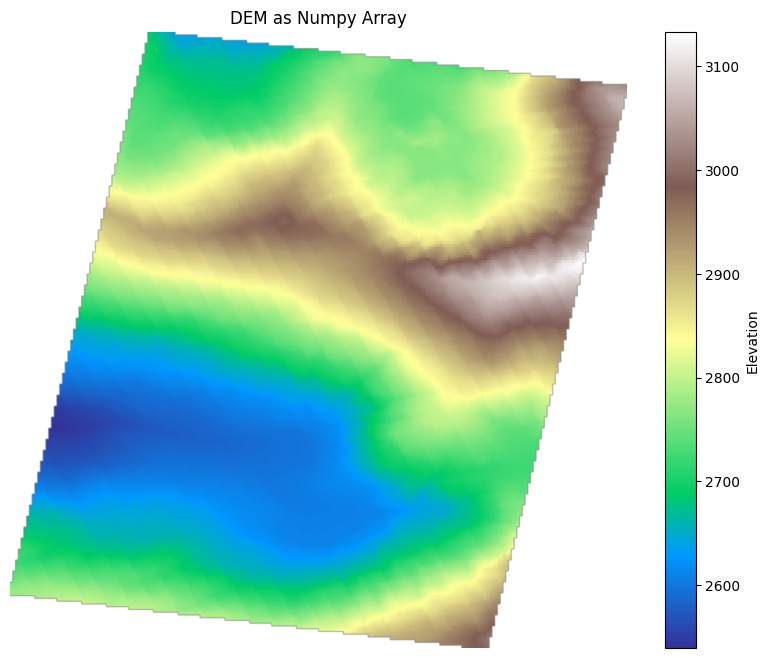

In [7]:
import numpy as np

# Convert dem to a 2D numpy array (remove band dimension if present)
dem_array = np.squeeze(dem)

plt.figure(figsize=(10, 8))
plt.imshow(dem_array, cmap='terrain')
plt.colorbar(label='Elevation')
plt.title('DEM as Numpy Array')
plt.axis('off')
plt.show()

In [8]:
dem_array

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]],
      shape=(224, 224), dtype=float32)

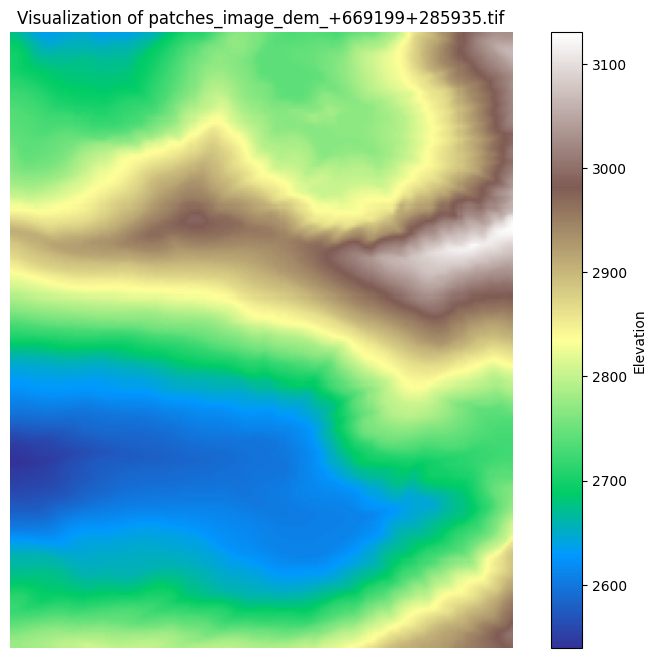

In [9]:
with rasterio.open("/u/nathanj/national_ml/data/script/gee_downloads/HUC8_10020007_Madison/patches_image_dem_+669199+285935.tif") as img_src:
    img_dem = img_src.read(1)
    plt.figure(figsize=(10, 8))
    plt.imshow(img_dem, cmap='terrain')
    plt.colorbar(label='Elevation')
    plt.title('Visualization of patches_image_dem_+669199+285935.tif')
    plt.axis('off')
    plt.show()

In [10]:
print(f"Width: {img_src.width}")
print(f"Height: {img_src.height}")


Width: 190
Height: 233
